# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Elisa Ramadanti
- **Email:** elisaramadanti11@gmail.com
- **ID Dicoding:** B244016E

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren jumlah penyewa sepeda berdasarkan bulan?
- Pertanyaan 2: Bagaimana Perbandingan jumlah penyewa sepeda berdasarkan bulan di setiap tahunnya?
- Pertanyaan 3: Apakah terdapat pola musiman dalam jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [5]:
# Data day.csv
day_df = pd.read_csv("/content/drive/MyDrive/Dataset/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Penjelasan tentang dataset
- instant: record index
- dteday: Tanggal
- season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr:  tahun (0: 2011, 1: 2012)
- mnth: bulan (1 sampai 12)
- holiday: 1 untuk hari libur, 0 untuk tidak libur
- weekday: Hari dalam minggu (0 = Minggu, 1 = Senin, dan seterusnya)
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu "feels like" atau suhu yang dirasakan.
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: jumlah total sepeda sewaan termasuk casual dan register.

In [6]:
#Data hour.csv
hour_df = pd.read_csv("/content/drive/MyDrive/Dataset/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:** Penjelasan dataset:
Berikut Informasi Terkait Dataset:

- instant: record index
- dteday: Tanggal
- season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr:  tahun (0: 2011, 1: 2012)
- mnth: bulan (1 sampai 12)
- hr: jam (0 hingga 23)
- holiday: 1 untuk hari libur, 0 untuk tidak libur
- weekday: Hari dalam minggu (0 = Minggu, 1 = Senin, dan seterusnya)
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu "feels like" atau suhu yang dirasakan.
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: jumlah total sepeda sewaan termasuk casual dan register.

### Assessing Data

**Menampilkan informasi dataset menggunakan fungsi info()**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Berdasarkan informasi yang diperoleh dari fungsi info() pada data day.csv, diketahui bahwa:

- Dataset ini memiliki total 16 kolom dan 731 baris.
- Terdapat 11 kolom dengan tipe data integer.
- Terdapat 4 kolom dengan tipe data float.
- Terdapat 1 kolom dengan tipe data object.

Pada Kolom dteday memiliki tipe data object, yang biasanya digunakan untuk menyimpan nilai berbentuk string. Maka akan lebih sesuai di lakukan perubahan menjadi datetime.

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Berdasarkan informasi yang diperoleh dari fungsi info() pada data day.csv, diketahui bahwa:

- Dataset ini memiliki total 17 kolom dengan 17379 baris.
- Terdapat 12 kolom dengan tipe data integer.
- Terdapat 4 kolom dengan tipe data float.
- Terdapat 1 kolom dengan tipe data object.

Pada Kolom dteday memiliki tipe data object, yang biasanya digunakan untuk menyimpan nilai berbentuk string. Maka akan lebih sesuai di lakukan perubahan menjadi datetime.

**Menampilkan Missing Value**

In [9]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Pada day.csv tidak memiliki missing value

In [10]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada hour.csv tidak memiliki missing value

**Memeriksa Duplikasi Data**

In [11]:
print("Jumlah duplikasi pada data day.cvs: ", day_df.duplicated().sum())

Jumlah duplikasi pada data day.cvs:  0


In [12]:
print("Jumlah duplikasi pada data hour.cvs: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data hour.cvs:  0


**Insight:**
- Pada day.csv dan hour.csv tidak ada duplikasi data

**Menampilkan Ringkasan dari kolom numerik dengan fungsi describe()**

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Menampilkan ringkasan parameter seperti mean, median, min, max, dll

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan ringkasan parameter seperti mean, median, min, max, dll

**Memeriksa Outlier menggunakan boxplot**

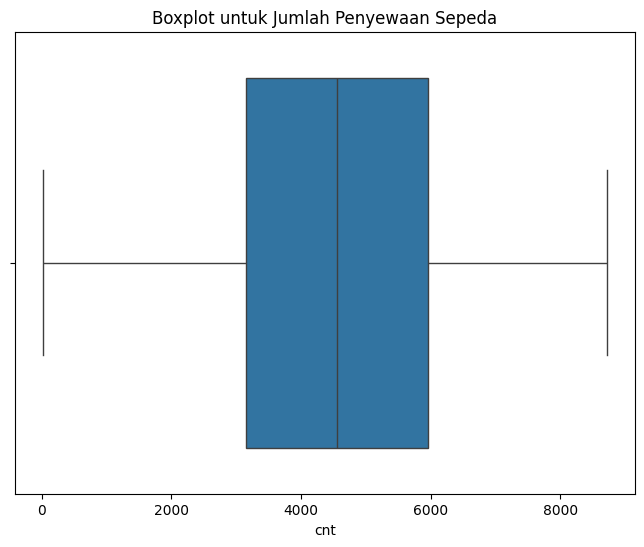

In [15]:
#day.csv
plt.figure(figsize=(8, 6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

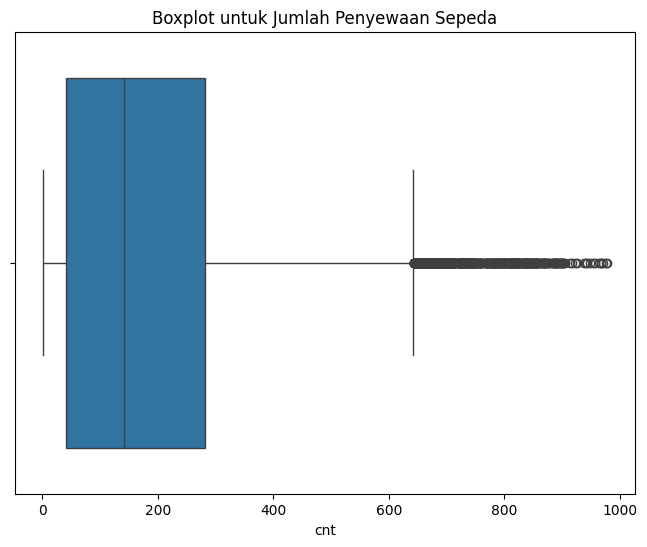

In [16]:
#hour.csv
plt.figure(figsize=(8, 6))
sns.boxplot(x=hour_df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**



*   Pada data hour.csv terdapat beberapa titik point yang merupakan outlier yang perlu dibersihkan.




### Cleaning Data

**Mengatasi Outlier**

In [17]:
# Menghitung Q1, Q3, dan IQR
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)
# Menghitung jumlah outlier
outlier_count = hour_df[(hour_df['cnt'] < minimum) | (hour_df['cnt'] > maximum)].shape[0]
print("Total jumlah outlier pada kolom 'cnt':", outlier_count)

Total jumlah outlier pada kolom 'cnt': 505


In [18]:
Q1 = (hour_df['cnt']).quantile(0.25)
Q3 = (hour_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

# Change axis to 0 to apply the mask along rows (index)
hour_df['cnt'] = hour_df['cnt'].mask(kondisi_more_than, maximum)
hour_df['cnt'] = hour_df['cnt'].mask(kondisi_lower_than, minimum)

**Insight:**
- Mengatasi outlier dengan menggunakan imputation, yaitu dengan mengganti outlier dengan nilai tertentu menggunakan metode mask().

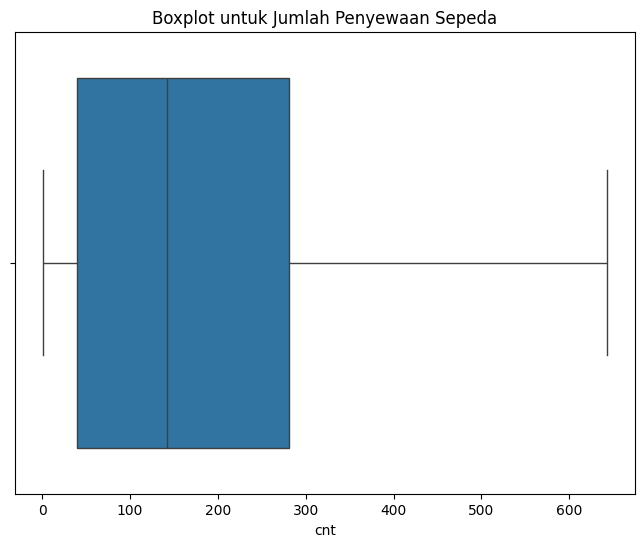

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=hour_df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**



*   Menampilkan box plot untuk melihat apakah data masih terdapat outlier atau tidak.

**Mengubah Tipe Data 'dteday'**

In [20]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data pada kolom dteday karena tidak sesuai, dimana baiknya menggunakan tipe data datetime bukan object

In [21]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah tipe data pada kolom dteday karena tidak sesuai, dimana baiknya menggunakan tipe data datetime bukan object

**Mengubah Nama Kolom**

In [22]:
day_df.rename(columns={'yr': 'year', 'mnth': 'month', 'workingday':'working_day', 'weathersit': 'weather'}, inplace=True)
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,working_day,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Perubahan ini lakukan untuk mempermudah pembacaan dan pemahaman data

In [23]:
clean_df = hour_df.rename(columns={'yr': 'year', 'mnth': 'month', 'hr':'hour', 'workingday':'working_day', 'weathersit': 'weather'})
clean_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,working_day,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


**Insight:**
- Perubahan ini lakukan untuk mempermudah pembacaan dan pemahaman data

**Menyimpan File**

In [24]:
clean_df.to_csv('clean_df.csv', index=False)

**Insight:**
- Data yang telah bersih di simpan ke format CSV

## Exploratory Data Analysis (EDA)

### Explore Data Clean_df

In [25]:
clean_df.describe()

,instant,dteday,season,year,month,hour,holiday,weekday,working_day,weather,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,186.361327
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.500000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,171.931168


**Insight:**
- Menampilkan ringkasan dataset kembali setelah cleaning data

**Melihat Jumlah penyewa sepeda berdasarkan tahun menggunakan fungsi groupby()**

In [26]:
clean_df.groupby(by="year").agg({
    'cnt': 'sum'
    }).reset_index().replace({'year': {0: 2011, 1: 2012}})


,year,cnt
0,2011,1243094.5
1,2012,1995679.0


**Insight:**
- Output yang keluar adalah tabel yang menampilkan jumlah penyewa di setiap tahunnya.

**Melihat jumlah penyewa berdasarkan bulan dalam 2 tahun ini yaitu dari 2011 dan 2012 menggunakan fungsi goupby()**

In [27]:
#jumlah penyewa sepeda berdasarkan bulan
clean_df.groupby(by="month").agg({
    'cnt':['sum','max','min']
}).reset_index().replace({'year': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
               7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}})


month       cnt            
               sum    max  min
0      1  134933.0  559.0  1.0
1      2  151352.0  610.0  1.0
2      3  226272.0  642.5  1.0
3      4  266407.0  642.5  1.0
4      5  327272.0  642.5  1.0
5      6  340861.5  642.5  1.0
6      7  338738.5  642.5  1.0
7      8  342256.0  642.5  1.0
8      9  333939.5  642.5  1.0
9     10  312446.0  642.5  1.0
10    11  254082.5  642.5  1.0
11    12  210213.5  642.5  1.0

**Insight:**
- Output yang keluar adalah tabel yang menampilkan total jumlah penyewa di setiap tahun bulan nya dengan jumlah max dan min.

**Melihat perbandingan jumlah penyewa sepeda berdasarkan tahun (2011 vs 2012) dan bulan dengan menggunakan fungsi groupby()**

In [28]:
#Tahun 2011
clean_df[clean_df['year'] == 0].groupby('month').agg({
    'cnt':['sum','max','min']
}).reset_index().replace({'year': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
               7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}})


month       cnt            
               sum    max  min
0      1   38189.0  249.0  1.0
1      2   48215.0  327.0  1.0
2      3   64045.0  336.0  1.0
3      4   94870.0  530.0  1.0
4      5  135821.0  611.0  1.0
5      6  143512.0  638.0  1.0
6      7  141341.0  596.0  1.0
7      8  136682.5  642.5  1.0
8      9  127418.0  628.0  1.0
9     10  123511.0  625.0  1.0
10    11  102167.0  553.0  1.0
11    12   87323.0  477.0  1.0

**Insight:**
- Output ini pada code ini adalah total penyewaan sepeda di tahun 2011 disetiap bulannya dengan menampilkan jumlah max dan min-nya.

In [29]:
#Tahun 2012
clean_df[clean_df['year'] == 1].groupby('month').agg({
    'cnt':['sum','max','min']
}).reset_index().replace({'year': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
               7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}})


month       cnt            
               sum    max  min
0      1   96744.0  559.0  1.0
1      2  103137.0  610.0  1.0
2      3  162227.0  642.5  1.0
3      4  171537.0  642.5  1.0
4      5  191451.0  642.5  1.0
5      6  197349.5  642.5  4.0
6      7  197397.5  642.5  2.0
7      8  205573.5  642.5  3.0
8      9  206521.5  642.5  3.0
9     10  188935.0  642.5  1.0
10    11  151915.5  642.5  1.0
11    12  122890.5  642.5  1.0

**Insight:**
- Output ini pada code ini adalah total penyewaan sepeda di tahun 2012 disetiap bulannya dengan menampilkan jumlah max dan min-nya.

**Melihat pola musimanan berpengaruh pada jumlah sewa sepeda**

In [35]:
clean_df.groupby(by="season").agg({
    'cnt':['sum','max']
}).reset_index().replace({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})


season        cnt       
                       sum    max
0    Musim Semi   470025.5  642.5
1   Musim Panas   906001.0  642.5
2   Musim Gugur  1036361.0  642.5
3  Musim Dingin   826386.0  642.5

**Insight:**
- Output ini pada code ini adalah total penyewaan sepeda di tahun 2012 disetiap bulannya dengan menampilkan jumlah max juga

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewa sepeda berdasarkan bulan?

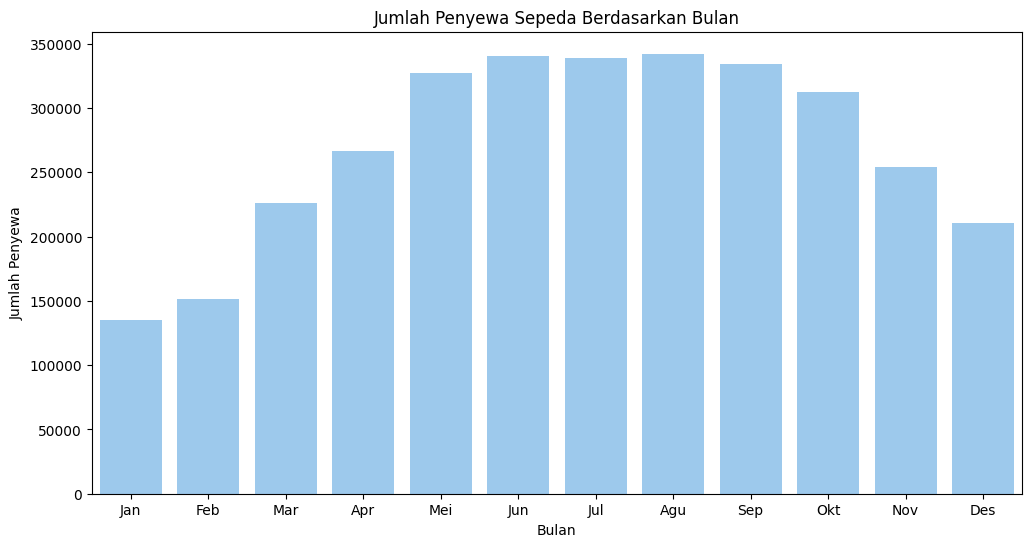

In [45]:
month_data = clean_df.groupby("month")['cnt'].sum().reset_index()
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
               7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}
month_data['month'] = month_data['month'].replace(month_names)

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', data=month_data, color='#90CAF9')
plt.title("Jumlah Penyewa Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.show()

**Insight:**
- Dari visualisasi data di atas, kita dapat melihat bahwa total jumlah penyewa sepeda tertinggi dalam 2 tahun (2011 dan 2012) berada pada bulan agustus

### Pertanyaan 2: Bagaimana Perbandingan jumlah penyewa sepeda berdasarkan bulan di setiap tahunnya?



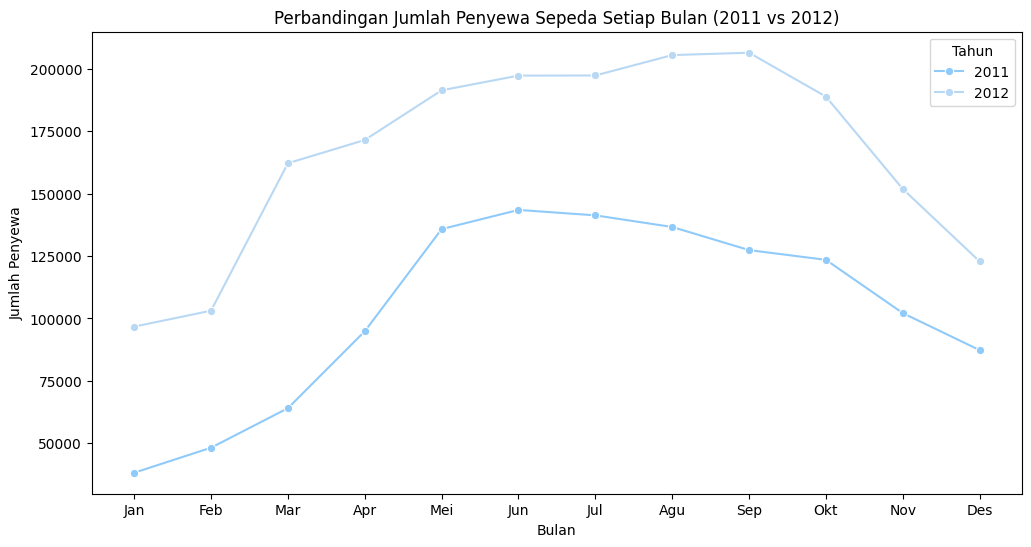

In [48]:
month_data = clean_df.groupby(['year', 'month'])['cnt'].sum().reset_index()
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
               7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}
month_data['month'] = month_data['month'].replace(month_names)

# Memisahkan data berdasarkan tahun 2011 dan 2012
data_2011 = month_data[month_data['year'] == 0]
data_2012 = month_data[month_data['year'] == 1]

# Membuat plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', data=data_2011, marker='o', label='2011', color='#90CAF9')
sns.lineplot(x='month', y='cnt', data=data_2012, marker='o', label='2012', color='#B9D8F3')
plt.title("Perbandingan Jumlah Penyewa Sepeda Setiap Bulan (2011 vs 2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.legend(title='Tahun')
plt.show()

**Insight:**
- Dari visualisasi data di atas, kita dapat melihat perbandingan jumlah penyewa sepeda antara tahun 2011 dan 2012. Dimana, pada tahun 2012, total jumlah penyewa tetinggi berada pada bulan september. Sedangkan pada tahun 2011 jumlah penyewa sepeda tertinggi ada pada bulan juni

### Pertanyaan 3: Apakah terdapat pola musiman dalam jumlah penyewaan sepeda?


<ipython-input-43-cf2c1c5feb74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_data,palette=["#B9D8F3","#B9D8F3","#90CAF9","#B9D8F3"])


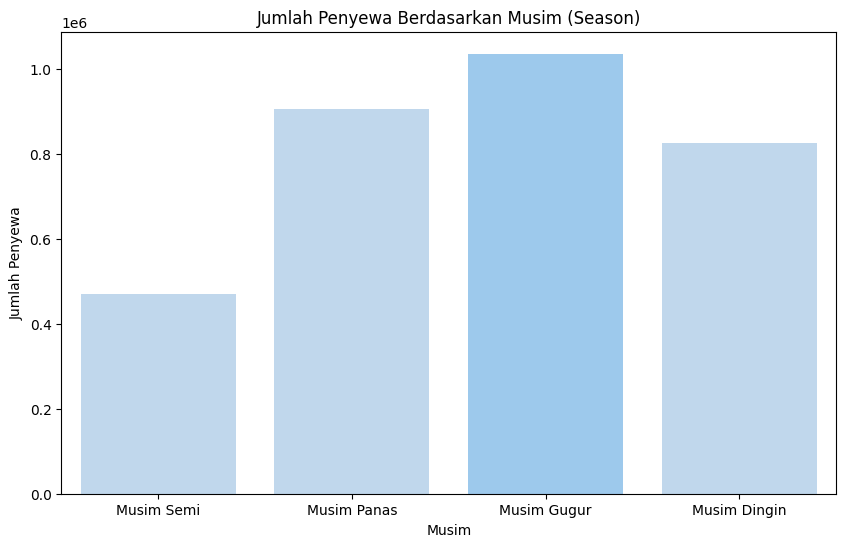

In [43]:
season_data = clean_df.groupby("season")['cnt'].sum().reset_index()
season_data['season'] = season_data['season'].replace({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_data,palette=["#B9D8F3","#B9D8F3","#90CAF9","#B9D8F3"])
plt.title("Jumlah Penyewa Berdasarkan Musim (Season)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewa")
plt.show()

**Insight:**
- Dari visualisasi data di atas, kita dapat melihat jumlah penyewa sepeda paling banyak pada musim gugur dan paling rendah ada pada musim semi

## Analisis Lanjutan (Opsional)

**Membuat kategori waktu untuk melihat jumlah penyewa sepeda berdasarkan waktu pagi, siang, sore dan malam**

In [38]:
def kategori_waktu(hour):
    if 5 <= hour < 11:
        return 'Pagi'
    elif 11 <= hour < 15:
        return 'Siang'
    elif 15 <= hour < 18:
        return 'Sore'
    else:
        return 'Malam'

clean_df['waktu'] = clean_df['hour'].apply(kategori_waktu)
waktu_sewa = clean_df.groupby('waktu')['cnt'].sum().reset_index()
waktu_sewa

,waktu,cnt
0,Malam,1060365.5
1,Pagi,761571.5
2,Siang,693808.5
3,Sore,723028.0


**Insight:**
- Kode di atas adalah untuk membuat kategori waktu baru (Pagi, Siang, Sore, Malam) dengan menggunakan fungsi kategori_waktu(). Kategori ini didefinisikan secara manual untuk mempermudah analisis penggunaan sepeda berdasarkan waktu.
- Dengan melakukan pengelompokan menggunakan groupby() pada kolom waktu dan akan menampilkan jumlah penyewa sepeda untuk setiap kategori waktu.

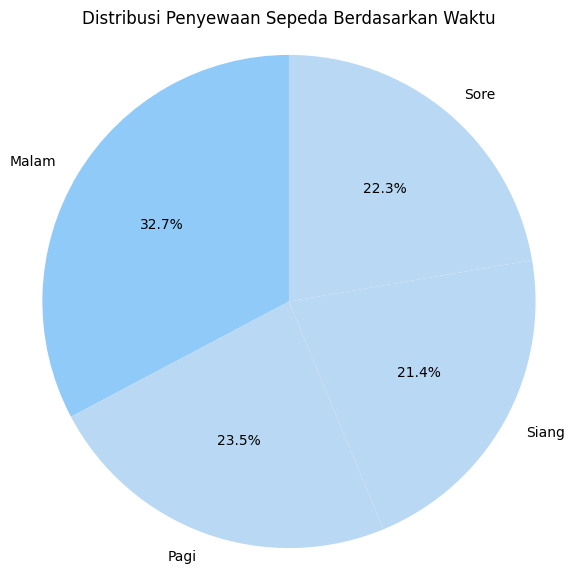

In [39]:
plt.figure(figsize=(7, 7))
plt.pie(waktu_sewa['cnt'], labels=waktu_sewa['waktu'], autopct='%1.1f%%', startangle=90, colors=["#90CAF9", "#B9D8F3",	"#B9D8F3","#B9D8F3"])
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Waktu')
plt.axis('equal')
plt.show()

**Insight:**
- Berdasarkan Visualisasi Diatas dapat di lihat bahwa kategori waktu yaitu malam memiliki jumlah penyewa sepeda terbanyak dari pada kategori waktu lainnya.

## Conclusion

- **Conclution pertanyaan 1:** Berdasarkan eksplorasi data dan visualisasi yang dilakukan, total penyewaan sepeda cenderung meningkat dari Januari dan mencapai puncaknya pada bulan Agustus. Setelah itu, jumlah penyewaan menurun pada bulan-bulan berikutnya hingga Desember. Penyewaan dari Mei hingga September mengalami peningkatan yang menunjukkan permintaan tinggi pada bulan-bulan tersebut. Jumlah penyewaan harian maksimum stabil di angka 642.5 mulai Maret hingga Desember, sementara nilai minimum tetap 1 di setiap bulan

- **Conclution pertanyaan 2**: Berdasarkan eksplorasi data dan visualisasi yang dilakukan, Pada tahun 2011, total penyewaan sepeda lebih rendah dibandingkan dengan tahun 2012 di setiap bulan, dengan peningkatan yang signifikan pada tahun kedua. Pada bulan Mei hingga September, jumlah penyewaan mencapai puncak baik pada 2011 maupun 2012, namun nilai total di tahun 2012 jauh lebih tinggi, dengan bulan September mencapai angka tertinggi. Sedangkan, jumlah penyewaan minimum per hari di tahun 2011 tetap 1 sepanjang tahun, sementara di 2012 minimum harian sedikit lebih tinggi pada beberapa bulan yang menunjukkan peningkatan permintaan yang konsisten. Jumlah penyewaan harian maksimum juga mengalami peningkatan di tahun 2012, dengan angka stabil di 642.5 mulai dari bulan Maret hingga Desember.

- **Conclution Pertanyaan 3:** Berdasarkan eksplorasi data dan visualisasi yang dilakukan untuk mengidentifikasi pola musiman dalam jumlah penyewaan sepeda, terlihat bahwa musim gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas, sementara musim dingin menunjukkan jumlah yang lebih rendah, dan musim semi dengan jumlah penyewaan terendah. Jumlah penyewaan harian maksimum stabil di angka 642.5 pada setiap musim, tetapi total penyewaan menunjukkan bahwa permintaan cenderung lebih tinggi pada musim-musim dengan cuaca lebih hangat seperti musim panas dan gugur.